## Loading all the dependencies

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
import seaborn as sns


In [ ]:
# Replace 'your_directory_path' with the actual path to your directory

True_path="/Users/tanishksingh/Downloads/True"
False_path="/Users/tanishksingh/Downloads/False"


# Walk through the directory True
for dirpath, _, filenames in os.walk(True_path):
    for file in filenames:
        if file == '.DS_Store':
            os.remove(os.path.join(dirpath, file))
            print(f'Removed: {os.path.join(dirpath, file)}')

# Walk through the directory False
for dirpath, _, filenames in os.walk(False_path):
    for file in filenames:
        if file == '.DS_Store':
            os.remove(os.path.join(dirpath, file))
            print(f'Removed: {os.path.join(dirpath, file)}')

## Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Convert the pictures into size of 250x250

In [ ]:

True_path="/content/drive/MyDrive/True"
False_path="/content/drive/MyDrive/False"


resize_size= (250,250)

for img in os.listdir(True_path):

    # Construct the full file path
    img_path = os.path.join(True_path, img)
    # Open the image
    with Image.open(img_path) as img:
        # Resize the image
        img_resized = img.resize(resize_size, Image.LANCZOS)

        # Save the resized image (overwrite the original file)
        img_resized.save(img_path)

        print(f"Processed and resized: {img}")


for img in os.listdir(False_path):

    # Construct the full file path
    img_path = os.path.join(False_path, img)
    # Open the image
    with Image.open(img_path) as img:
        # Resize the image
        img_resized = img.resize(resize_size, Image.LANCZOS)

        # Save the resized image (overwrite the original file)
        img_resized.save(img_path)

        print(f"Processed and resized: {img}")



Processed and resized: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250 at 0x7D644B11DB40>
Processed and resized: <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=250x250 at 0x7D644B11D000>
Processed and resized: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250 at 0x7D644B11E6E0>
Processed and resized: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=250x250 at 0x7D644B070B50>
Processed and resized: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=250x250 at 0x7D644B11DB40>
Processed and resized: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=250x250 at 0x7D644B070B50>
Processed and resized: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=250x250 at 0x7D644B11C130>
Processed and resized: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=250x250 at 0x7D644B070C40>


## Converting images into numerical data

In [ ]:
True_path="/content/drive/MyDrive/True"
False_path="/content/drive/MyDrive/False"
images=[]
labels=[]



for image in os.listdir(True_path):
    img_path=os.path.join(True_path,image)
    img=cv2.imread(img_path)
    color_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if img is not None:
        images.append(color_img)
        labels.append(1)

for image in os.listdir(False_path):
    img_path=os.path.join(False_path,image)
    img=cv2.imread(img_path)
    color_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if img is not None:
        images.append(color_img)
        labels.append(0)
print(images[0].shape)

(250, 250, 3)


## Visualize images

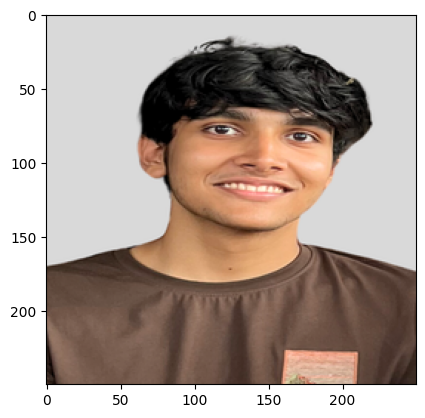

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[1])


## Normalize images and shuffling them for randomness

In [ ]:
from sklearn.utils import shuffle
images = np.array(images, dtype='float32') / 255.0
labels = np.array(labels, dtype='int32')
images, labels = shuffle(images, labels, random_state=42)
print(images.shape)
print(labels.shape)


(5, 250, 250, 3)
(5,)


## Splitting Training and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=56)

In [ ]:
input_shape = (250, 250, 3)  # (height, width, channels)
num_classes = 2


# Reshape the input data to 4D tensor
X_train = X_train.reshape((-1, *input_shape))
X_test = X_test.reshape((-1, *input_shape))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4, 250, 250, 3)
(1, 250, 250, 3)
(4,)
(1,)


## Defining the Model

In [ ]:


# Define your model architecture (similar to previous examples)
def create_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the model
input_shape = X_train.shape[1:]  # Assuming X_train shape is (num_samples, height, width, channels)
print(input_shape)
num_classes = 2  # Number of classes
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


(250, 250, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 124, 124, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 29, 

## Training the model

In [ ]:

# Train the model
batch_size = 32
epochs = 5

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)
)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.7210 - accuracy: 0.2500 - val_loss: 26.5177 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 1.2848 - accuracy: 0.7500 - val_loss: 18.9760 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 1.2195 - accuracy: 0.7500 - val_loss: 6.8510 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 0.3634 - accuracy: 0.7500 - val_loss: 7.3507 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 0.0566 - accuracy: 1.0000 - val_loss: 7.4567 - val_accuracy: 0.0000e+00


## Visualize the loss and accuracy table with epochs

In [ ]:
print(history.history.keys())  # To see what metrics are available


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


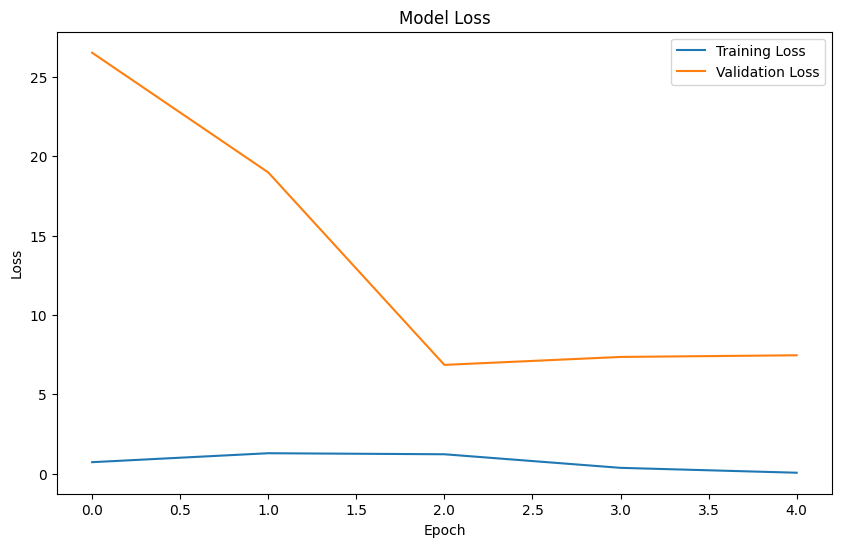

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()



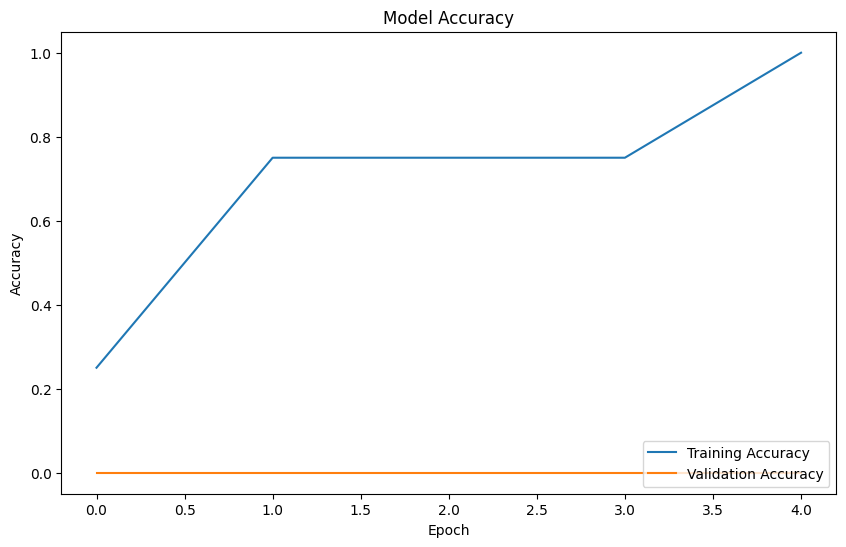

In [ ]:

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


## Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test loss: {loss:.4f}')
print("Accuracy",str(accuracy*100)[:5]+"%")

1/1 [==============================] - 0s 117ms/step - loss: 7.4567 - accuracy: 0.0000e+00
Test loss: 7.4567
Accuracy 0.0%


In [ ]:
# Predict labels for the test data
y_pred = model.predict(X_test)

# Predicted class labels
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 245ms/step


## Confusion Matrix

Confusion Matrix:


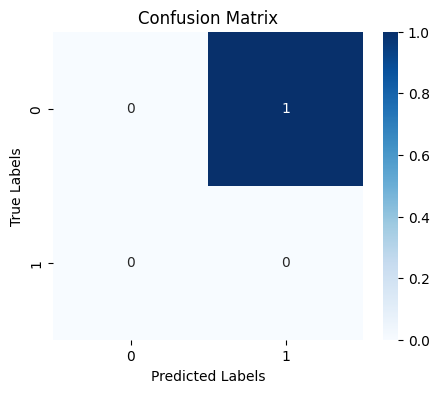

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Exploring More Models

### 2. Logistic Regression

In [ ]:
print(images.shape)

(8, 250, 250, 3)


#### Defining Model and training

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


images = images.reshape(images.shape[0], -1)


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)



#### Calculating its Accuracy

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.00


#### Confusion Matrix

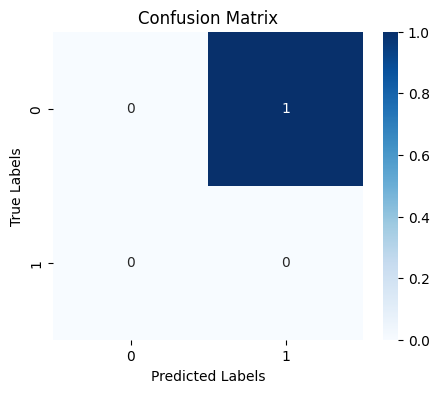

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### Classification report

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

### 3. SVM

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)


#### Accuracy

In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.00


#### Confusion matrix and classification report

Confusion Matrix:


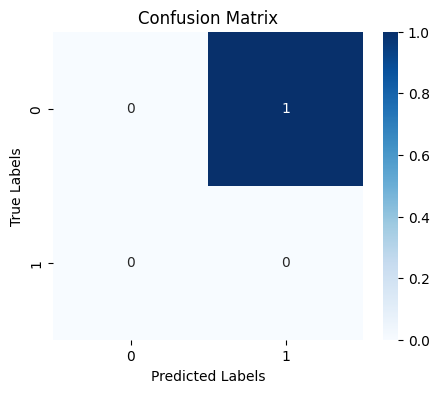

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

### 4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)



#### Accuracy

In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.0


### 5. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 5

#### Accuracy

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00


## Conclusion